## Simple Linear Regression Demonstration

We're using the python libraries scikit-learn and pandas

Load the training data from a csv (comma separated values) file.

In [1]:
import pandas as pd

df = pd.read_csv('https://s3.eu-west-1.amazonaws.com/neueda.conygre.com/pydata/ml_fc/demo2_data.csv')
df

YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0

Do a quick plot of the data to check is the relationship betweeen the variables broadly linear.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002699EE7ABC8>,
      dtype=object)

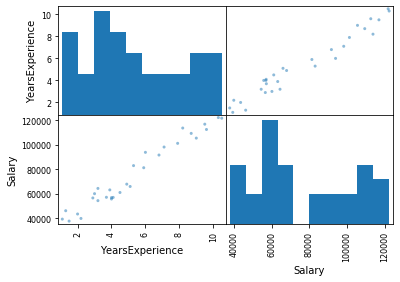

In [2]:
%matplotlib inline

from pandas.plotting import scatter_matrix

scatter_matrix(df)

Separate the 'input' and 'output' variables.

In [3]:
X = df[ ['YearsExperience'] ]      ## Cause -> "independant variable set"
 
y = df['Salary']         ## Effect -> "dependant variable"


Keep 20% of the data aside to test the model later. The remaining 80% of data will be used to train the model.

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


Train a simple linear regression model on the training data.

In [5]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Plot:

* the model's prediction line in blue
* the data that was given to the model to train on in red
* the remaining untested data is plotted in green.

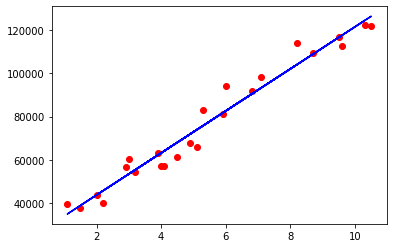

In [6]:
import matplotlib.pyplot as plt

plt.scatter(X_train, y_train, color='red')

plt.plot(X_train, model.predict(X_train), color='blue')

In [7]:
# predict the salary if years experience is 4

model.predict([[4]])

array([63167.28249642])

Get a general accuracy score of how well the model predicts the 20% of data that was kept aside.

In [8]:
from sklearn.metrics import r2_score

r2_score(y_test, model.predict(X_test))

0.9151360946473752

Try a different linear regression model to see how they compare.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

In [9]:
from sklearn.linear_model import Ridge

# create a Ridge model object
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)

# check the accuracy of this new model with the test data
r2_score(y_test, ridge_model.predict(X_test))

0.9171745263284372